In [20]:
#Enes Bilgin
#ID: 504191512
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def debug(st, val):
    print(st + ": " + str(val))


# Part 1: Momentum accelerated Gradient Descent 

### Background

In Vanilla Gradient Descent (the standard gradient descent algorithm), the parameters are updated in the direction of negative gradient. In equation form: 
### <center> $ \textbf{w}^k =\textbf{w}^{k-1} - \alpha \nabla g(\textbf{w}^{k-1}) $ <center> 

However, this update rule causes oscillating, or "zig-zagging" in the direction of the gradient. In order to overcome this, one can use the exponential average of the past descent directions, which is called "momentum". This allows the gradients to change directions more smoothly and eliminates zig-zags, producing better results in optimization. The update rule in equation form:

### <center>$ \textbf{d}^{k-1} = \beta \textbf{d}^{k-2} + (1 - \beta) (-\nabla g(\textbf{w}^{k-1})) $ <center>

### <center> $ \textbf{w}^k = \textbf{w}^{k-1} + \alpha \textbf{d}^{k-1} $ <center>

Note that when "beta" is equal to 0, above update rule is the same as the one in Vanilla Gradient Descent.

### Part 1.1: Code Up Momentum Accelerated Gradient Descent (25 Points)

In the below cell, code up the "momentum accelerated gradient descent" to find the "w" value that minimizes the quadratic function of the form: 
### <center> $ g(\textbf{w}) = a + \text{b}^T \textbf{w} + \textbf{w}^T \text{C} \textbf{w}$ <center>

Make three runs of the algorithm: one run of "Vanilla Gradient Descent" i.e make beta = 0, and two runs of "Momentum Accelerated Gradient Descent where you pick two "beta" parameters between 0.2 and 0.7, for the coefficients: 

### <center> $a = 0,$ b$=\begin{bmatrix}0 \\ 0\end{bmatrix}$ and $C=\begin{bmatrix}0.5 & 0 \\ 0 & 9.75\end{bmatrix}$ <center>

__Use learning rate of 0.1 and run for 25 iterations in each run.__

 - For each run, plot the change of $\text{w}$ parameter throughout the iterations on the contour plot of the function $g(\text{b})$. Code to plot this is provided to you. Use the function "plot_WHistory()". You only need to calculate the list of $\text{w}$ parameters, then call the function passing the necessary parameters to it. Contour plot helps observe the change in the direction of gradients. An example plot is given at the end of Part 1.1. Your code will generate 3 plots in total. 
 
 - In addition, generate a dynamic animated plot for each run, displaying gradient descent at each iteration. It will be animated version of the static plot generated by "plot_WHistory()". You will fill in "animate_plot_Whistory()" by yourself.  Note that I have created 3 extra cells for animated plots, use them for animations (1 animation per cell). 



In [2]:
def Inverser(matrix):
    det = 1 /( (matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0]) )
    if det == 0.0:
        print("Invertible Matrix Uses Psuedo Inverse Method")
        return (Inverser((matrix.T).dot(matrix))).dot(matrix.T)
    else:
        a = np.ones([2 ,2]) 
        a[0][0] = matrix[1][1]
        a[0][1] = -matrix[1][0]
        a[1][0] = -matrix[0][1]
        a[1][1] = matrix[0][0]
    
        a = det * a
        return a

def gradientOfQuadraticFunc(w,Q,r):
    return (2*Q.dot(w)) + r  
    
def gradientDescentWithMomentum(lr = 1e-1, beta = 0, num_iter=25, w_0 = None, a=0, b=np.zeros((2,1)), c = np.zeros((2,2))):
    '''
        lr: learning rate
        beta: momentum parameter [0,1]
        num_iter = number of iterations in gradient descent
        w_0: initial w
        a, b, c: coefficients of the function
    '''
    #Initialize variables
    d = 0 #Momentum term
    w_history = [] #List of w's in each iteration, used to plot
    if w_0 is not None: #Initial w
        w = w_0
    else:
        w = np.random.rand(2,1) #If no w_0 is given, initialize it randomly between [0, 1]
   
    ### YOUR CODE STARTS HERE
    
    # You may want to code the g(w) and gradient functions here or compute the gradients at each step, it is up to you.

    # Calculate gradients of initial w_0 (Don't forget to add w_0 to w_history list!)
    w_history.append(w)
    #print("First W:" + str(w))
    #Gradient Descent Steps
    for i in range(num_iter):
        #Update momentum and w
        #Add new w to list
        d = beta*d +(1-beta)*gradientOfQuadraticFunc(w,c,b)
        w = w - lr*d
        w_history.append(w)   
        pass
    ### YOUR CODE ENDS HERE    
        
    return w, w_history

def plot_WHistory(w_history, beta, a=0, b=np.zeros((2,1)), c = np.zeros((2,2)), w0_min = -2.0, w0_max = 11.0, w1_min = -2.0, w1_max = 2.0):
    #Plot Contour
    w0_list = np.linspace(w0_min, w0_max, 100)
    w1_list = np.linspace(w1_min, w1_max, 100)
    W0, W1 = np.meshgrid(w0_list, w1_list)
    g = np.empty([100,100])
    vectorize_w = lambda w0, w1: np.array([[w0], [w1]])
    func = lambda w: int(a + np.matmul(b.T, w) + np.matmul(np.matmul(w.T, c), w))
    
    for i in range(100):
        for j in range(100):
            g[i,j] = func(vectorize_w(W0[i,j], W1[i,j]))
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(w0_list, w1_list, g)
    fig.colorbar(cp) # Add a colorbar to a plot
    if beta is not None: #If beta is given, gradient descent is plotted
        ax.set_title('Gradient Descent w/ Momentum, Beta = {}'.format(beta))
    else: #If beta is None, Newton's Method is being plotted
        ax.set_title("Newton's Method")
    ax.set_xlabel('w_0')
    ax.set_ylabel('w_1')
    #Plot weights as a line
    plt.plot(*zip(*w_history), 'ro-')
    plt.show()
        

def animate_plot_WHistory(w_history, beta, a=0, b=np.zeros((2,1)), c = np.zeros((2,2)), w0_min = -2.0, w0_max = 11.0, w1_min = -2.0, w1_max = 2.0):
    #Plot Contour
       # You can copy stuff from plot_WHistory for here
    w0_list = np.linspace(w0_min, w0_max, 100)
    w1_list = np.linspace(w1_min, w1_max, 100)
    W0, W1 = np.meshgrid(w0_list, w1_list)
    g = np.empty([100,100])
    vectorize_w = lambda w0, w1: np.array([[w0], [w1]])
    func = lambda w: int(a + np.matmul(b.T, w) + np.matmul(np.matmul(w.T, c), w))
    
    for i in range(100):
        for j in range(100):
            g[i,j] = func(vectorize_w(W0[i,j], W1[i,j]))
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(w0_list, w1_list, g)
    fig.colorbar(cp) # Add a colorbar to a plot
    if beta is not None: #If beta is given, gradient descent is plotted
        ax.set_title('Gradient Descent w/ Momentum, Beta = {}'.format(beta))
    else: #If beta is None, Newton's Method is being plotted
        ax.set_title("Newton's Method")
    ax.set_xlabel('w_0')
    ax.set_ylabel('w_1')

    line, = ax.plot([],[], 'ro-')
    x_data = []
    y_data = []
    x_data.append(w_history[0][0])
    y_data.append(w_history[0][1])
    line.set_data(x_data, y_data)
    
    def animate(i):
        x_data.append(i[0])
        y_data.append(i[1])
        
        line.set_data(x_data, y_data)
        return (line,)
           
    ani = FuncAnimation(fig, animate, frames=w_history, interval=300,blit=True)
    return ani


W found by algorithm: [[ 0.71789799]
 [-0.27738957]]


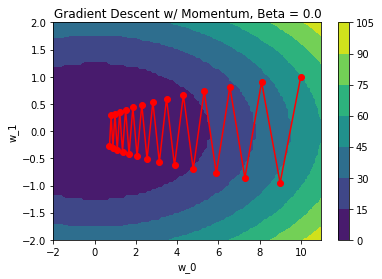

W found by algorithm: [[ 6.58215378e-01]
 [-3.05288119e-07]]


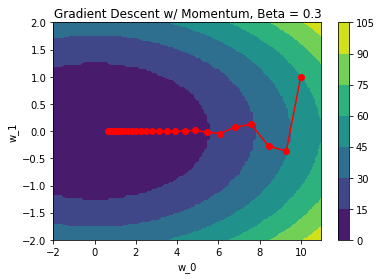

W found by algorithm: [[5.68493970e-01]
 [4.78151637e-05]]


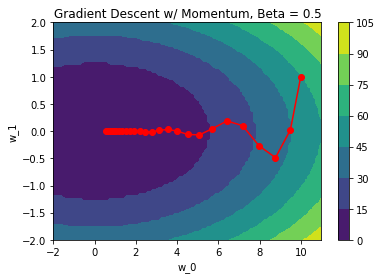

In [3]:
num_of_runs = 3 #Number of runs

#Initial w
w_0 = np.array([[10], 
                [1]]) 

#YOUR CODE STARTS HERE

#Coefficients of g(w)
a = 0
b = np.array([[0],[0]]) 
c = np.matrix([[0.5, 0], [0, 9.75]])

#Hyperparameters of gradient descent
lr = 0.1
beta = np.array([0,0.3,0.5])
iteration = 25

for i in range(num_of_runs):
    #Call gradient descent function
    w_final, w_history = gradientDescentWithMomentum(lr, beta[i], iteration, w_0, a, b, c)
    print("W found by algorithm: " + str(w_final))
    #Plot w_history
    plot_WHistory(w_history,beta[i],a,b,c)

#YOUR CODE ENDS HERE


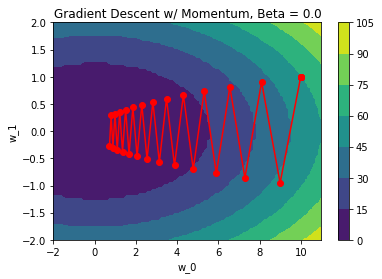

In [4]:
#Animate first run here
w_final, w_history = gradientDescentWithMomentum(lr, beta[0], iteration, w_0, a, b, c)
ani = animate_plot_WHistory(w_history,beta[0],a,b,c)
HTML(ani.to_html5_video())

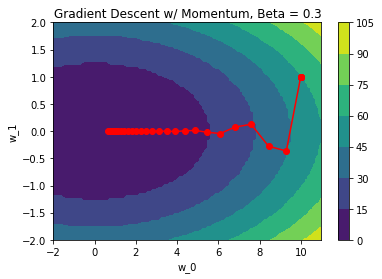

In [5]:
#Animate second run here
w_final, w_history = gradientDescentWithMomentum(lr, beta[1], iteration, w_0, a, b, c)
ani = animate_plot_WHistory(w_history,beta[1],a,b,c)
HTML(ani.to_html5_video())

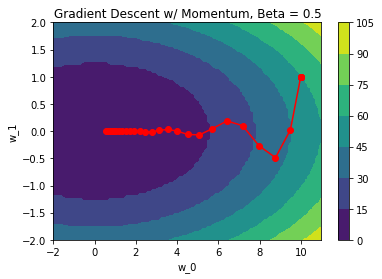

In [6]:
#Animate third run here
w_final, w_history = gradientDescentWithMomentum(lr, beta[2], iteration, w_0, a, b, c)
ani = animate_plot_WHistory(w_history,beta[2],a,b,c)
HTML(ani.to_html5_video())

### Part 1.2: Compare and interpret the results. (5 Points)
__What did you observe? Which one of the approaches was better? Which beta value was more optimal?__

Graphs show us that the higher beta value quickly find the right region

# Part 2: Newton's Method (30 points)

### Background

Newton's method finds the local minima by moving towards to stationary points of second order Taylor series approximation, with the following update formula:
### <center> $\text{w}^k = \text{w}^{k-1} - (\nabla^2 g(\text{w}^{k-1}))^{-1} \nabla g(\text{w}^{k-1})$ <center>

However, as the dimension of $\text{w}$ increases linearly, computation of the Hessian matrix $\nabla^2 g(\text{w}^{k-1})$ and necessary amount of storage increases quadratically at best. The easiest ways to overcome this issue is to sub-sample the Hessian matrix, in which only some part of the Hessian is used in computation. One way of doing this is to only use the diagonal entries of the Hessian matrix. This way, instead of computing the $NxN$ Hessian matrix, only $N$ entries needed to be computed. Update formula is also simplified to a component-wise update: 

### <center> $ w_n^k = w_n^{k-1} - \frac{\frac{\partial}{\partial w_n}g(w^{k-1})}{\frac{\partial^2}{\partial w_n^2}g(w^{k-1})} $ <center>

for $n=1,2,3...N$.

### Part 2.1: Code up the sub-sampled Newton's Method (25 Points)

Code up the "sub-sampled Newton's Method" in the relevant notebook cell by ignoring all off-diagonal elements of the Hessian, as explained above, to find the "$\text{w}$ that minimizes the same quadratic function of the form:
### <center> $ g(\textbf{w}) = a + \text{b}^T \textbf{w} + \textbf{w}^T \text{C} \textbf{w}$ <center>

Run both Newton's Method and Gradient Descent algorithms for the coefficients  $a = 0,$ b$=\begin{bmatrix}0 \\ 0\end{bmatrix}$ and $C=\begin{bmatrix}0.5 & 2 \\ 1 & 9.75\end{bmatrix}$. Run both algorithms for 25 iterations, starting with $w_0=\begin{bmatrix}10 \\ 1\end{bmatrix}$. For gradient descent, choose learning rate as $0.1$. 

 - For both runs, plot the change of w parameter throughout the iterations on the contour plot. Again, you can use the provided function "plot_WHistory()". Calculate list of w parameters from each step to plot the steps. An example plot is given at the end of Part 2.1. Your code will generate 2 plots in total. 
 - In addition, generate a dynamic animated plot for both runs, displaying gradient descent at each iteration. It will be animated version of the static plot generated by "plot_WHistory()". You can use the same "animate_plot_Whistory()" function from Part 1. Note that I have created 2 extra cells for animated plots, use them for animations (1 animation per cell). 


In [7]:
def secondDerivative(Q):
    return Q.T + Q

def NewtonsMethodwithSubSampling(num_iter=25, w_0 = None, a=0, b=np.zeros((2,1)), c = np.zeros((2,2))):
    '''
        num_iter = number of iterations in gradient descent
        w_0: initial w
        a, b, c: coefficients of the function
    '''
    #Initialize variables
    history = [] #List of w's in each iteration, used to plot
    epsilon = 1e-6 # Add it to denominator to avoid division by zero
    if w_0 is not None: #Initial w
        w = w_0
    else:
        w = np.random.rand(2,1) #If no w_0 is given, initialize it randomly between [0, 1]
    
    ### YOUR CODE STARTS FROM HERE
    
    # You may want to code the g(w) and gradient functions here or compute the gradients at each step, it is up to you.
    
    #Calculate gradients of initial w_0 (Don't forget to add w_0 to w_history list!)
    history.clear()
    history.append(w)
    w_new = np.zeros((2,1))
    sderivative = secondDerivative(c)
    feature_count = 2
    #Newton's Method steps
    for i in range(num_iter):
        #Update w, add w to w_history
        gradient_w = gradientOfQuadraticFunc(w,c,b)
        for j in range(feature_count):
            w_new[j]= w[j] -  (gradient_w[j]/(sderivative[j,j] + epsilon))
            history.append(w_new)
            w = w_new
    ### YOUR CODE ENDS HERE
    return w, history



W found by algorithm: [[ 1.81529747]
 [-1.88637055]]


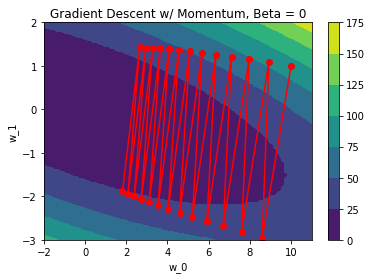

W found by algorithm: [[-9.09264944e-05]
 [-4.60488497e-05]]


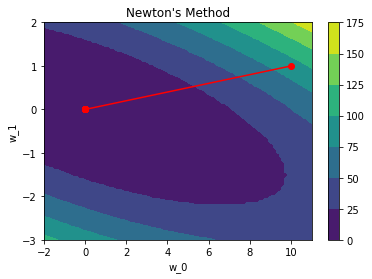

In [8]:
#Initial w
w_0 = np.array([[10], 
                [1]]) 
### YOUR CODE STARTS FROM HERE
#Coefficients of g(w)
a = 0
b = np.array([[0],[0]]) 
c = np.matrix([[0.5, 2], [1, 9.75]])

#Hyperparameters of gradient descent
lr = 0.1
iteration = 25

#Run Gradient Descent and plot the steps
w_final, w_history = gradientDescentWithMomentum(lr,0, iteration, w_0, a, b, c)
print("W found by algorithm: " + str(w_final))
plot_WHistory(w_history,0,a,b,c, w0_min = -2.0, w0_max = 11.0, w1_min = -3.0, w1_max = 2.0)

#Run Newton's Method and plot the steps
w_final, w_history3 = NewtonsMethodwithSubSampling(iteration, w_0, a, b, c)
print("W found by algorithm: " + str(w_final))
plot_WHistory(w_history3,None, a, b, c, w0_min = -2.0, w0_max = 11.0, w1_min = -3.0, w1_max = 2.0)

### YOUR CODE ENDS HERE ###

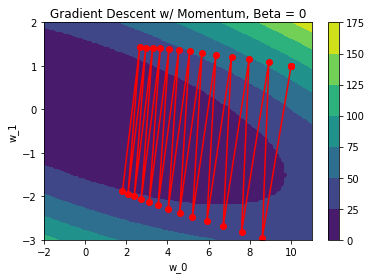

In [9]:
#Animate first run here
w_final, w_history = gradientDescentWithMomentum(lr,0, iteration, w_0, a, b, c)
ani = animate_plot_WHistory(w_history,0,a,b,c,w0_min = -2.0, w0_max = 11.0, w1_min = -3.0, w1_max = 2.0)
HTML(ani.to_html5_video())

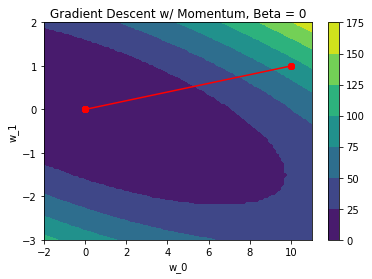

In [10]:
#Animate second run here
w_final, w_history = NewtonsMethodwithSubSampling(iteration, w_0, a, b, c)
ani = animate_plot_WHistory(w_history,0,a,b,c,w0_min = -2.0, w0_max = 11.0, w1_min = -3.0, w1_max = 2.0)
HTML(ani.to_html5_video())

### Part 2.2: Compare and interpret the performances of both algorithms. (5 Points)
__Which one of the approaches performed better? What do you think made the difference?__

<center>As it seen on animations using Newton's method with this quadratic function finds minima in a single step.</center>


# Part 3: Gradient Descent for Logistic Regression (20 Points)

### Background

In logistic regression, the aim is to minimize the "Least Squares cost" function, which is:

$g(b, w)=\sum_{p=1}^{P}\left(\sigma\left(b+\mathbf{x}_{p}^{T} \mathbf{w}\right)-y_{p}\right)^{2}$

where $\mathbf{x}_{p}=\left[\begin{array}{llll}x_{1, p} & x_{2, p} & \dots & x_{N, p}\end{array}\right]^{T}$ and $\mathbf{w}_{p}=\left[\begin{array}{llll}w_{1} & w_{2} & \dots & w_{N}\end{array}\right]^{T}$.

The gradient descent step with respect to above Least Squares cost function is then:

$\Delta g(\tilde{w})=2 \sum_{p=1}^{P}\left(\sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)-y_{p}\right) \sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)\left(1-\sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)\right) \tilde{x}_{p}$

This step can be written more compactly by denoting

$\begin{aligned} \sigma_{p}^{k-1} &=\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}^{k-1}\right) \\ r_{p}^{k-1} &=2\left(\sigma_{p}^{k-1}-y_{p}\right) \sigma_{p}^{k-1}\left(1-\sigma_{p}^{k-1}\right) \end{aligned}$

for all $p=1, \ldots, P$ and $\mathbf{r}^{k-1}=\left[\begin{array}{llll}r_{1}^{k-1} & r_{2}^{k-1} & \ldots & r_{P}^{k-1}\end{array}\right]^{T}$, and stacking the $\tilde{\mathbf{x}}_{p}$ column-wise into the matrix $\tilde{\mathbf{X}}$. Then the gradient can be written as:

$\Delta g\left(\tilde{\mathbf{w}}^{k-1}\right)=\tilde{\mathbf{X}} \mathbf{r}^{k-1}$

For programming languages like Python and MATLAB/OCTAVE that have especially efficient implementations of matrix/vector operations this can be much more efficient than explicitly summing over the P points. In other words, these steps are shown for programming simplicity on Python/Matlab like languages.

### 3.1: Complete gradient descent function

In this exercise you will reproduce the gradient descent paths shown in the Figure below:

<img src="https://web.itu.edu.tr/kamard/Fig3_1_note.png" style="width: 600px;" />

The surface in this figure was generated using the code below with the dataset $bacteria\_data.csv$, and you must complete a short gradient descent function to produce the descent paths called

$[i n, o u t]=g r a d_{-} d e s c e n t\left(\tilde{\mathbf{X}}, \mathbf{y}, \tilde{\mathbf{w}}^{0}\right)$

where "in" and "out" contain the gradient steps $\tilde{\mathbf{w}}^{k}=\tilde{\mathbf{w}}^{k-1}-\alpha_{k} \nabla g\left(\tilde{\mathbf{w}}^{k-1}\right)$ taken corresponding objective value $g\left(\tilde{\mathbf{w}}^{k}\right)$ respectively, $\tilde{\mathbf{X}}$ is the input data matrix, $y$ the output values and $\tilde{\mathbf{w}}^{0}$ the initial point.

Almost all of this function has already been constructed for you. For example, the step length is fixed at $\alpha_{k}=10^{-2}$ for all iterations, etc., and you must only enter the gradient of the associated cost function. Pressing "run" in the editor will run gradient descent and will reproduce __Figure 1__.

In [11]:
# This part is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.


Load data and plot.

In [12]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

Functionality required for a proper gradient descent algorithm.

In [13]:
### TODO: YOUR CODE GOES HERE - COMPLETE THE GRADIENT DESCENT CODE ###

def logisticFunc(s):
    return (1/(1 + my_exp(-s)))

def myMul(x,y):
    assert x.shape == y.shape
    assert x.shape[1] == 1
    assert y.shape[1] == 1
    
    r = np.zeros([x.shape[0],x.shape[1]])
    for k in range(x.shape[0]):
        r[k] = x[k]*y[k]
    return r
        

def gradientOfLogistic(w,X,y):
    logistic = logisticFunc(np.dot(X,w))
    r = myMul(myMul((logistic - y), logistic),( 1- logistic))
    grad = np.dot(X.T, r)
    return grad

# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
        
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # compute gradient
        grad = gradientOfLogistic(w,X,y)
        
        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):            
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

Plotting functions necessary to producing the data, fit, cost surface, and descent points.

In [14]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1][0] + w_path[-1][1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    # reshape 
    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

Now that everything is defined we can run all.

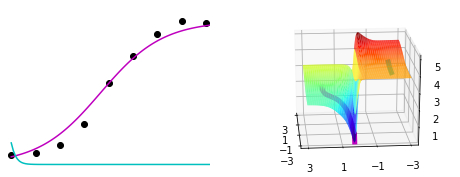

In [15]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2)
plt.show()

# Part 4: Gradient Descent for $\ell_{2}$ Regularized Logistic Regression (20 Points)

### Background

The Least Squares cost function of $\ell_{2}$ regularized Logistic regression is:

$g(b, w)=\sum_{p=1}^{P}\left(\sigma\left(b+x_{p}^{T} w\right)-y_{p}\right)^{2}+\lambda\|w\|_{2}^{2}$

The gradient of the cost function can be written as: 

$\nabla g(\tilde{\mathbf{w}})=2 \sum_{p=1}^{P}\left(\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}\right)-y_{p}\right) \sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}\right)\left(1-\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}\right)\right) \tilde{\mathbf{x}}_{\mathbf{p}}+2 \lambda\left[\begin{array}{l}0 \\ \mathbf{w}\end{array}\right]$

### 4.1 Complete the gradient descent function

<img src="https://web.itu.edu.tr/kamard/Fig3_2_note.png" style="width: 600px;" />

In this exercise you will reproduce __Figure 2__ by coding up gradient descent to minimize the regularized logistic regression Least Squares cost function. The surface in the figure was generated using the code below with the dataset $bacteria\_data.csv$, and you must complete a short gradient descent function to produce the descent paths called

$[i n, o u t]=g r a d_{-} d e s c e n t\left(\tilde{\mathbf{X}}, \mathbf{y}, \tilde{\mathbf{w}}^{0}\right)$

where "in" and "out" contain the gradient steps $\tilde{\mathbf{w}}^{k}=\tilde{\mathbf{w}}^{k-1}-\alpha_{k} \nabla g\left(\tilde{\mathbf{w}}^{k-1}\right)$ taken corresponding objective value $g\left(\tilde{\mathbf{w}}^{k}\right)$ respectively, $\tilde{\mathbf{X}}$ is the input data matrix, $y$ the output values and $\tilde{\mathbf{w}}^{0}$ the initial point.

Almost all of this function has already been constructed for you. For example, the step length is fixed at $\alpha_{k}=10^{-2}$ for all iterations, etc., and you must only enter the gradient of the associated cost function. Pressing "run" in the editor will run gradient descent and will reproduce __Figure 2__.

In [16]:
# This part is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.


Load data and plot.

Functionality required for a proper gradient descent algorithm.

In [17]:
### TODO: YOUR CODE GOES HERE - COMPLETE THE GRADIENT DESCENT FUNCTION ###

def gradientOfReqularizedLogistic(w,X,y,lam):
    grad = gradientOfLogistic(w,X,y)
    nW = np.zeros([2,1])
    nW[1] = w[1]
    grad = grad + 2*lam*nW
    return grad 

# run gradient descent
def gradientDescentWithReqularization(X,y,w0,lam):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # compute gradient
        grad = gradientOfReqularizedLogistic(w,X,y,lam)

        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path

Plotting functions necessary to producing the data, fit, cost surface, and descent points.

In [18]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1,0] + w_path[-1,1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax,lam):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)
    surf = surf + lam*t**2

    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))
    
    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

Now that everything is defined we can run all.

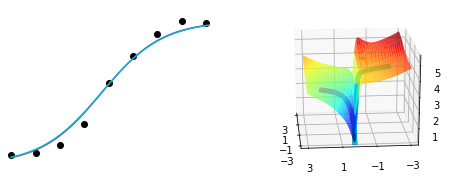

In [19]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

# define regularizer parameter
lam = 10**-1

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradientDescentWithReqularization(X,y,w0,lam)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradientDescentWithReqularization(X,y,w0,lam)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2,lam)
plt.show()

## References
[1] Watt, J., Borhani, R., and Katsaggelos, A. (2016). Machine Learning Refined: Foundations, Algorithms, and Applications. Cambridge: Cambridge University Press. doi:10.1017/CBO9781316402276

[2] Jianqiang Lin, Sang-Mok Lee, Ho-Joon Lee, and Yoon-Mo Koo. Modeling of typical microbial cell growth in batch culture. Biotechnology and Bioprocess Engineering, 5(5) 382385, 2000.